In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


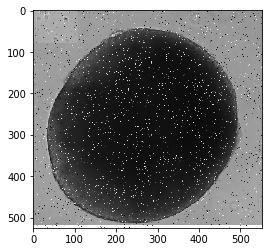

In [2]:
# Imagem Original

img = cv2.imread('CelB1.bmp')

imgOriginal = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgOriginal)

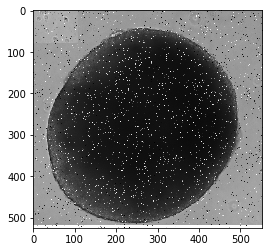

In [3]:
# Imagem Cinza

imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(imgCinza, 'gray')

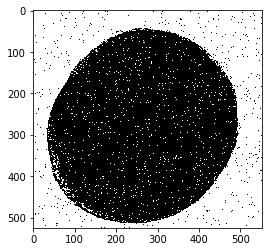

In [4]:
# Imagem Binarizada (imagem sem filtragem) com Filtro Mediana 3x3

ret, imgBinarizadaSemFiltragem = cv2.threshold(imgCinza, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgBinarizadaSemFiltragem = cv2.bitwise_not(imgBinarizadaSemFiltragem)

plt.imshow(imgBinarizadaSemFiltragem, 'binary')

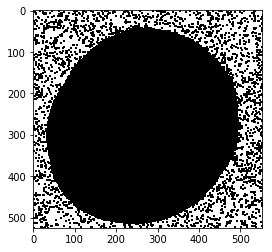

In [6]:
# Imagem Dilatada (imagem sem filtragem)

kernel = np.ones((5, 5), np.uint8)
imgDilatadaSemFiltragem = cv2.dilate(imgBinarizadaSemFiltragem, kernel, iterations = 1)

plt.imshow(imgDilatadaSemFiltragem, 'binary')


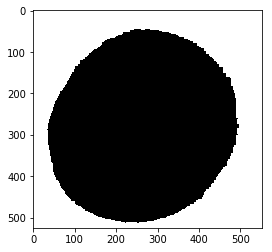

In [22]:
# Imagem Erodida (imagem sem filtragem após erosão)

kernel = np.ones((5, 5), np.uint8)
imgErodidaSemFiltragem = cv2.erode(imgDilatadaSemFiltragem, kernel, iterations = 2)

imgAuxiliar, contornos, hierarquia = cv2.findContours(imgBinarizada,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(imgErodidaSemFiltragem, 'binary')


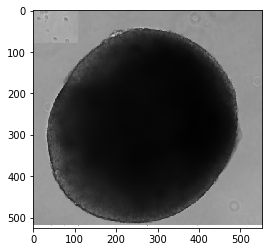

In [8]:
# Imagem Cinza com Filtro Mediana 3x3

imgMediana = cv2.medianBlur(imgCinza, 3)

plt.imshow(imgMediana, 'gray')

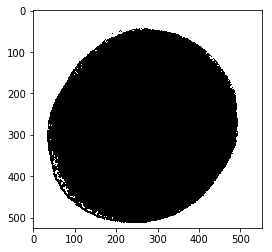

In [9]:
# Imagem Binarizada com OTSU

ret, imgBinarizada = cv2.threshold(imgMediana, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgBinarizada = cv2.bitwise_not(imgBinarizada)

plt.imshow(imgBinarizada, 'binary')

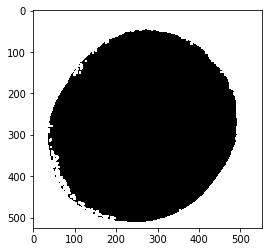

In [10]:
# Imagem Erodida

kernel = np.ones((5, 5), np.uint8)
imgErodida = cv2.erode(imgBinarizada, kernel, iterations = 1)

plt.imshow(imgErodida, 'binary')

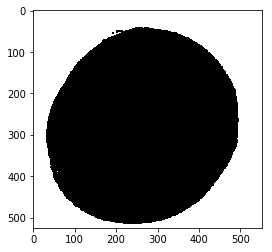

In [11]:
# Imagem Dilatada

#kernel = np.array([[0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0]], np.uint8)

kernel = np.ones((5, 5), np.uint8)
imgDilatada = cv2.dilate(imgBinarizada, kernel, iterations = 1)

plt.imshow(imgDilatada, 'binary')

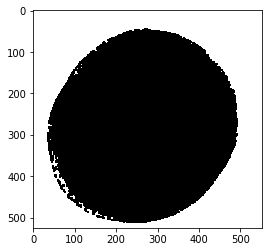

In [12]:
# Imagem Aberta

kernel = np.ones((5, 5), np.uint8)
imgAberta = cv2.morphologyEx(imgBinarizada, cv2.MORPH_OPEN, kernel)

plt.imshow(imgAberta, 'binary')

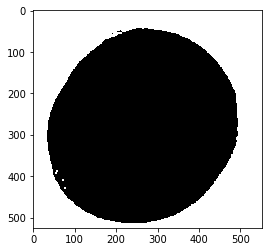

In [13]:
# Imagem Fechada

kernel = np.ones((5 ,5), np.uint8)
imgFechada = cv2.morphologyEx(imgBinarizada, cv2.MORPH_CLOSE, kernel)

plt.imshow(imgFechada, 'binary')

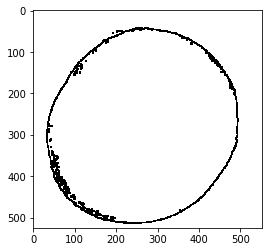

In [14]:
# Imagem Dif

imgBorder = cv2.absdiff(imgErodida, imgDilatada)

plt.imshow(imgBorder, 'binary')

In [16]:
# Mostra Imagem Através do Opencv

cv2.imshow('Imagem', imgErodidaSemFiltragem)
cv2.waitKey(0)
cv2.destroyAllWindows()
